# World Happiness Score Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [118]:
df= pd.read_csv("happiness_score_dataset.csv")

In [119]:
df


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [82]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [83]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [84]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

as we can see, theres only 2 columns with dtype = object i.e. string which indicates its a categorical data column. Also, the data in the first two columns is ordinal in nature, as each country name and their rank is unique.  

In [85]:
for i in df.columns:
    print(df.loc[df[i] == 0])
 # as most of the columns have float datatype which tells us that none of the rows have blanks as a datapoint which points to the fact that Nan values could have been filled with a 0. 
#so we check with equating the column rows and locating a 0.  

Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness Score, Standard Error, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual]
Index: []
Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness Score, Standard Error, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual]
Index: []
Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness Score, Standard Error, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual]
Index: []
Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness Score, Standard Error, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual]
Index: []
Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness

As the amount of 0's in the dataset is low, we can ignore it and proceed with further cleaning of the dataset.

In [86]:
len(df['Happiness Score'].unique())                #157 unique values is present in our target column   

157

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [88]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# EDA

First we'll try to visualiza the relationship between various different columns using bivariate analysis

<AxesSubplot:xlabel='Family', ylabel='Country'>

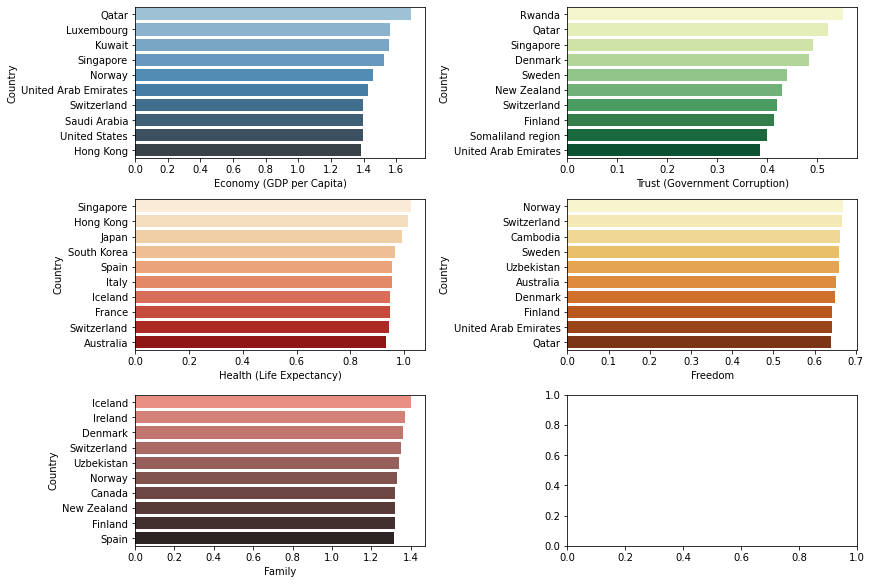

In [89]:
fig, axes = plt.subplots(nrows=3, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='Economy (GDP per Capita)',y='Country',data=df.nlargest(10,'Economy (GDP per Capita)'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Trust (Government Corruption)' ,y='Country',data=df.nlargest(10,'Trust (Government Corruption)'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Health (Life Expectancy)' ,y='Country',data=df.nlargest(10,'Health (Life Expectancy)'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom' ,y='Country',data=df.nlargest(10,'Freedom'),ax=axes[1,1],palette='YlOrBr')

sns.barplot(x='Family' ,y='Country',data=df.nlargest(10,'Family'),ax=axes[2,0],palette='dark:salmon_r')

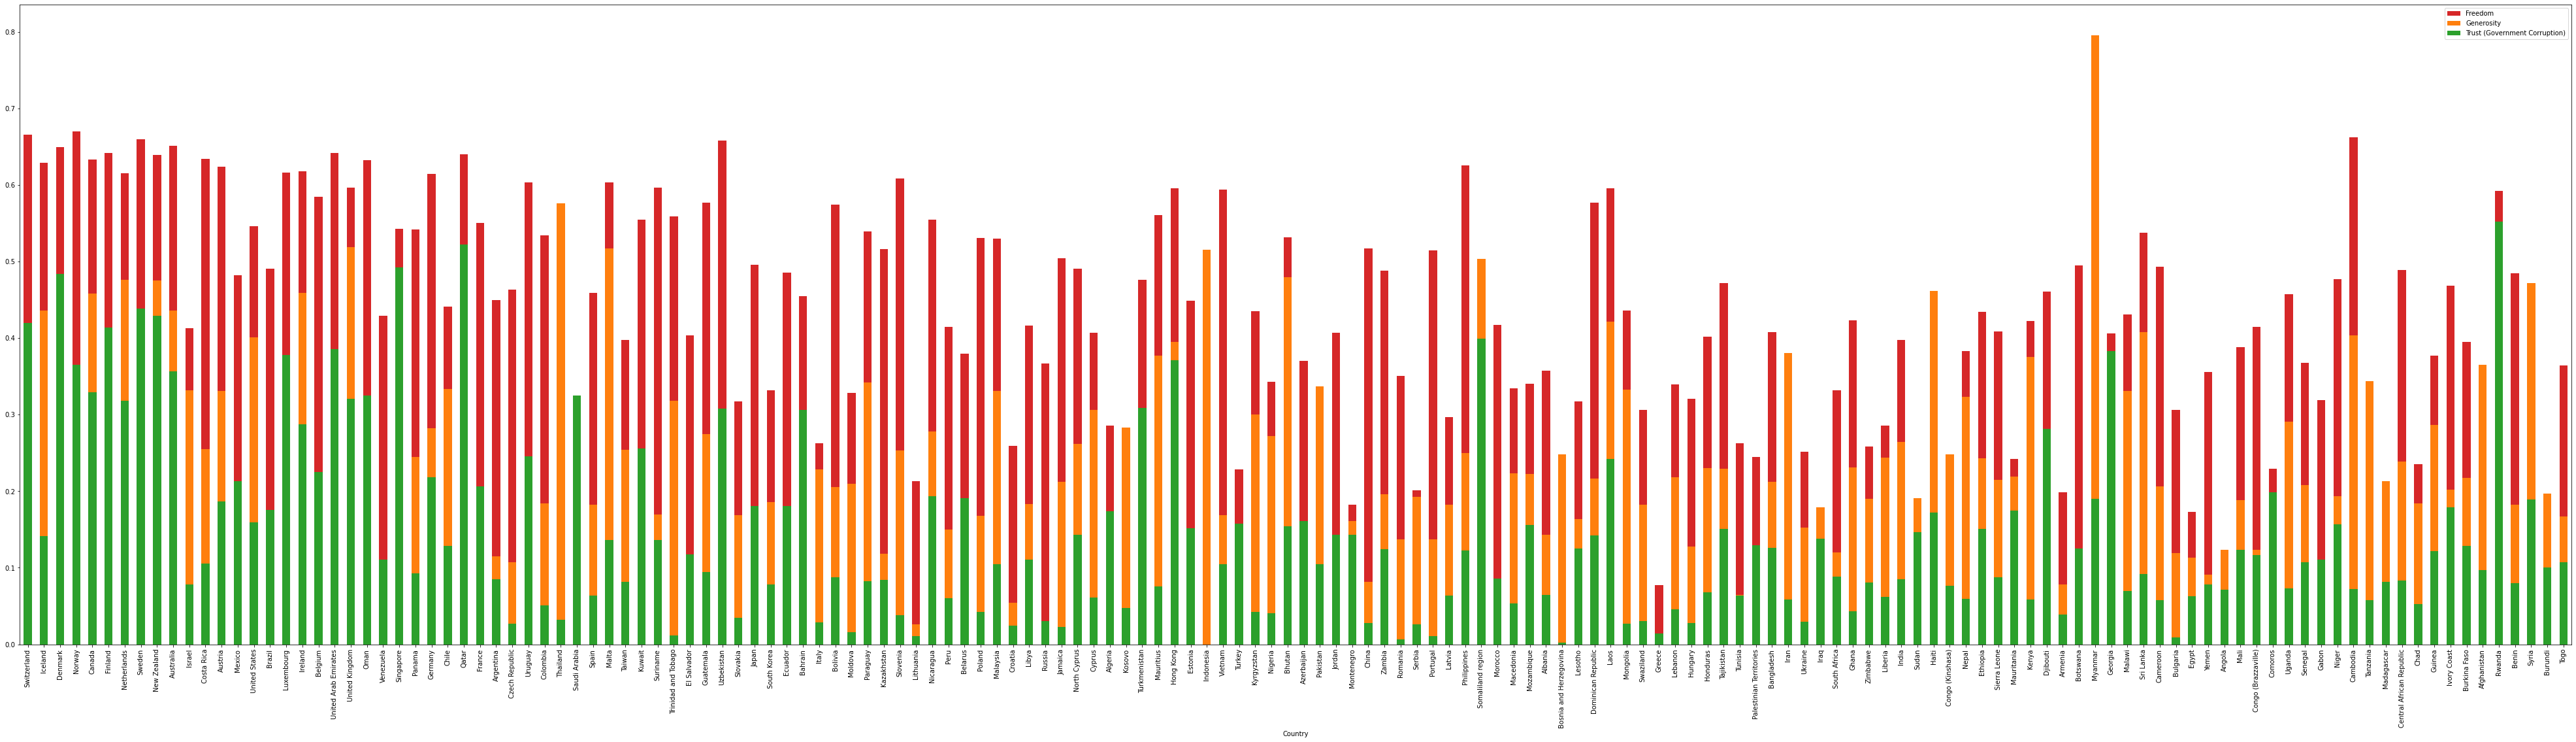

In [90]:
ax = df.plot(y="Freedom", x="Country", kind="bar",color='C3')
df.plot(y="Generosity", x="Country", kind="bar", ax=ax, color="C1",)
df.plot(y="Trust (Government Corruption)", x="Country", kind="bar", ax=ax, color="C2",figsize=(70,18))

plt.show()

In [91]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

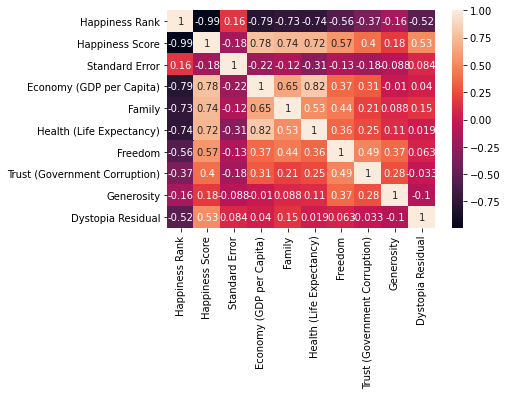

In [92]:
sns.heatmap(df.corr(),annot=True)

We can infer from the above chart that Happiness score is highly correlated to Economy, Family, Health the most. The freedom and Dystopia Residual comes second in place.

To visualize the correlation, 

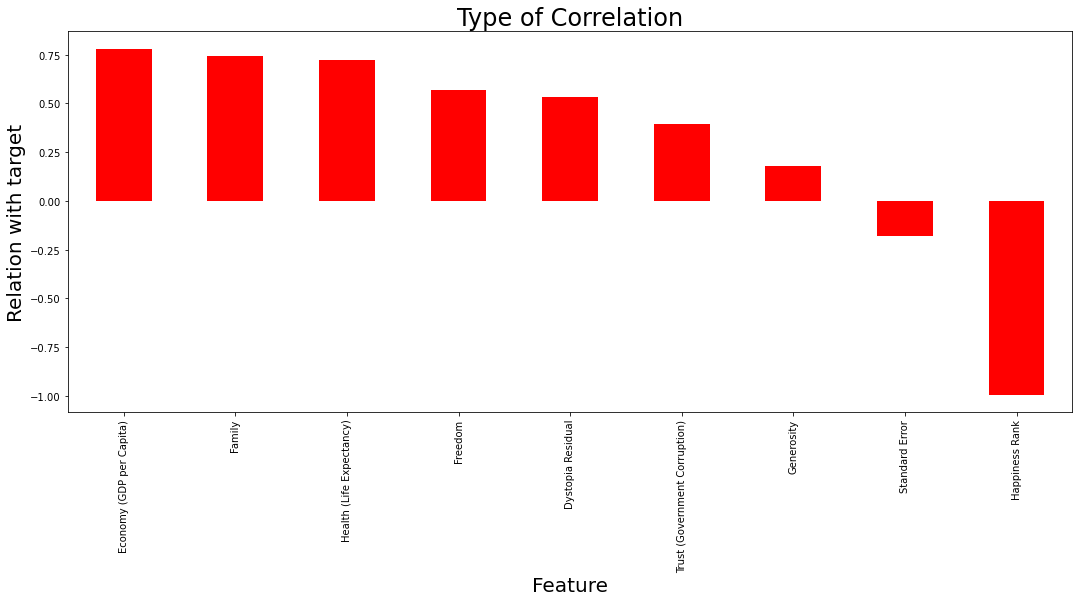

In [93]:
plt.figure(figsize=(18,7))
df.corr()[ "Happiness Score"].sort_values(ascending=False).drop(['Happiness Score']).plot(kind="bar",color='r')
plt.xlabel("Feature",fontsize=20)
plt.ylabel("Relation with target",fontsize=20)
plt.title("Type of Correlation",fontsize=24)
plt.show()

In [151]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [152]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [154]:
df

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [122]:
df = df.drop(columns=["Standard Error", "Happiness Rank"])


<AxesSubplot:>

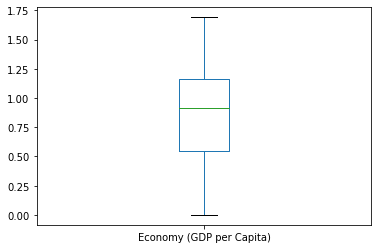

In [142]:
df['Economy (GDP per Capita)'].plot.box()

<AxesSubplot:>

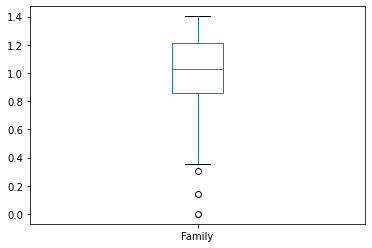

In [143]:
df['Family'].plot.box()

<AxesSubplot:>

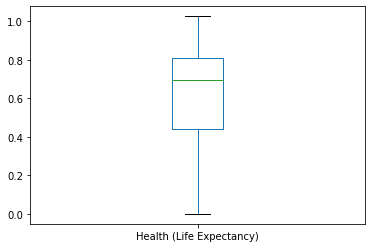

In [144]:
df['Health (Life Expectancy)'].plot.box()

<AxesSubplot:>

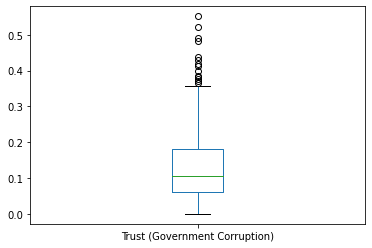

In [145]:
df["Trust (Government Corruption)"].plot.box()

<AxesSubplot:>

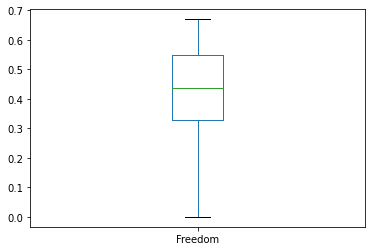

In [146]:
df["Freedom"].plot.box()

<AxesSubplot:>

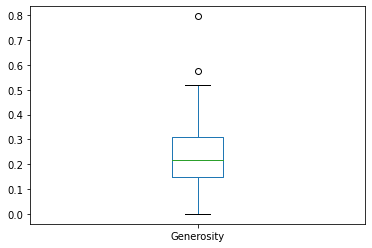

In [147]:
df["Generosity"].plot.box()

<AxesSubplot:>

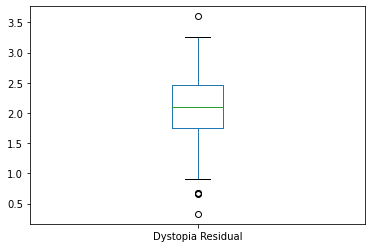

In [148]:
df["Dystopia Residual"].plot.box()

In [149]:
df.shape

(158, 10)

In [153]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 27, 128, 147, 153, 155, 157], dtype=int64),
 array([7, 8, 4, 7, 9, 4], dtype=int64))

In [155]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
150,66.0,8.0,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20.0,8.0,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.0,7.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13.0,8.0,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


# Separating the columns into feature and target :

In [156]:
features=df.drop("Happiness Score",axis=1)
target=df["Happiness Score"]

# Scaling the data

In [157]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [159]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [160]:
lr.fit(features_train,target_train)

LinearRegression()

In [161]:
pred_test=lr.predict(features_test)

In [162]:
print(r2_score(target_test,pred_test))

0.9999999490290702


In [164]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)


from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.9999997252516055 and accuracy score for training is -1.2821974812766777 and accuracy for the testing is 0.9999999490290702


At cross fold 3 the cv score is 0.9999995026140112 and accuracy score for training is -1.2821974812766777 and accuracy for the testing is 0.9999999490290702


At cross fold 4 the cv score is 0.9999988341535042 and accuracy score for training is -1.2821974812766777 and accuracy for the testing is 0.9999999490290702


At cross fold 5 the cv score is 0.9999982385569565 and accuracy score for training is -1.2821974812766777 and accuracy for the testing is 0.9999999490290702


At cross fold 6 the cv score is 0.9999972561413585 and accuracy score for training is -1.2821974812766777 and accuracy for the testing is 0.9999999490290702


At cross fold 7 the cv score is 0.9999958752886545 and accuracy score for training is -1.2821974812766777 and accuracy for the testing is 0.9999999490290702


At cross fold 8 the cv score is 0.999995634076

In [165]:
from sklearn.linear_model import ElasticNet
enr = ElasticNet(alpha=0.0001)
enr.fit(features_train,target_train)
print(enr.score(features_train,target_train))
pred_test=enr.predict(features_test)
print(r2_score(target_test,pred_test))

0.9999989319605624
0.999998996378294
